In [1]:
!tree data/aclImdb

文件夹 PATH 列表
卷序列号为 000000FC 2109:26B9
E:\PROJECTS\PYCHARMPROJECTS\MACHINELEARNINGPROJECT\07HANDLETEXTDATA\DATA\ACLIMDB
├─test
│  ├─neg
│  └─pos
└─train
    ├─neg
    └─pos


In [2]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
# load_files返回一个Bunch对象，其中包含训练文本和训练标签
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decisio

In [3]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [4]:
import numpy as np

print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [12500 12500]


In [5]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]


Number of documents in test data: 25000
Samples per class (test): [12500 12500]


In [6]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [8]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [9]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [10]:
print("Dense representation of bag_of_words:\n{}".format(
    bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [11]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))


X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [12]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))


Number of features: 74849
First 20 features:
['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
Features 20010 to 20030:
['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']
Every 2000th feature:
['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Mean cross-validation accuracy: 0.88


D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:

X_test = vect.transform(text_test)
print("{:.2f}".format(grid.score(X_test, y_test)))

0.88


In [16]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [17]:
feature_names = vect.get_feature_names_out()

print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']
Features 20010 to 20030:
['repentance' 'repercussions' 'repertoire' 'repetition' 'repetitions'
 'repetitious' 'repetitive' 'rephrase' 'replace' 'replaced' 'replacement'
 'replaces' 'replacing' 'replay' 'replayable' 'replayed' 'replaying'
 'replays' 'replete' 'replica']
Every 700th feature:
['00' 'affections' 'appropriately' 'barbra' 'blurbs' 'butchered' 'cheese'
 'commitment' 'courts' 'deconstructed' 'disgraceful' 'dvds' 'eschews'
 'fell' 'freezer' 'goriest' 'hauser' 'hungary' 'insinuate' 'juggle'
 'leering' 'maelstrom' 'messiah' 'music' 'occasional' 'parking'
 'pleasantville' 'pronunciation' 'recipient' 'reviews' 'sas' 'shea'
 'sneers' 'steiger' 'swastika' 'thrusting' 't

In [18]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best cross-validation score: 0.89


D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['it', 'seem', 'by', 'per', 'latter', 'very', 'here', 'eight', 'wherein', 'either', 'i', 'whence', 'sometimes', 'an', 'whole', 'hereupon', 'see', 'none', 'down', 'part', 'you', 'as', 'me', 'co', 'third', 'seemed', 'else', 'show', 'because', 'amount', 'mostly', 'these']


In [20]:
# 指定stop_words="english"将使用内置列表。
# 我们也可以扩展这个列表并传入我们自己的列表。
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))


X_train with stop words:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [21]:

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best cross-validation score: 0.88


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5),
                     LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


In [23]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# 变换训练数据集
X_train = vectorizer.transform(text_train)
# 找到数据集中每个特征的最大值
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 获取特征名称
feature_names = np.array(vectorizer.get_feature_names_out())

print("Features with lowest tfidf:\n{}".format(
    feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
    feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
Features with highest tfidf: 
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [24]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
    feature_names[sorted_by_idf[:100]]))


Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


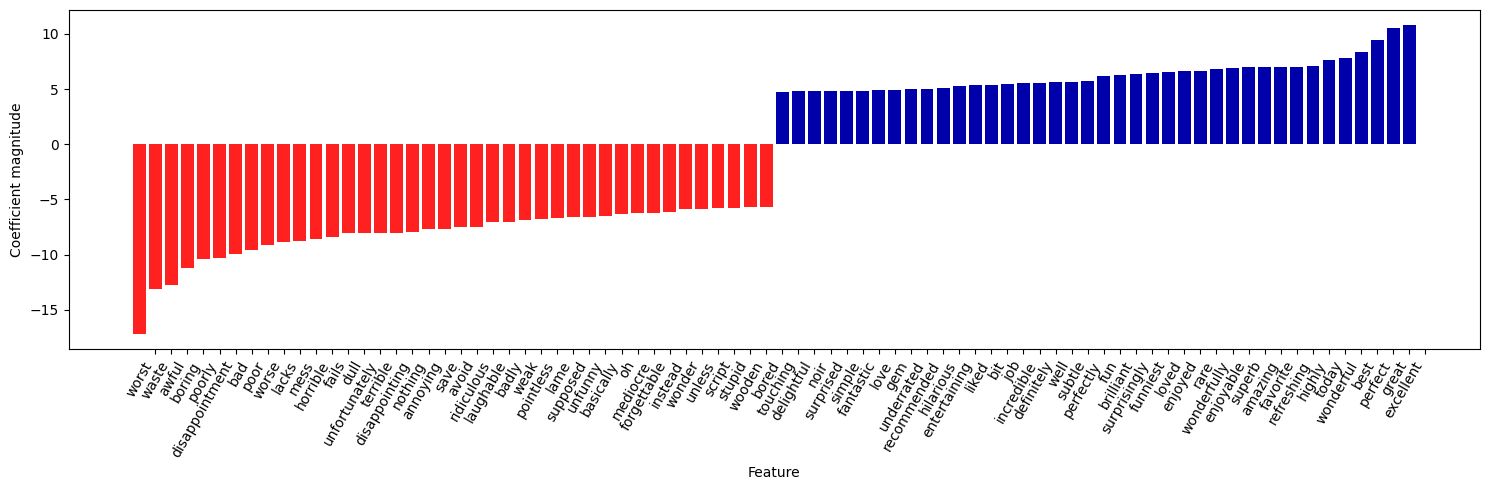

In [25]:
import mglearn
import matplotlib.pyplot as plt

mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

plt.tight_layout()
plt.savefig('Images/00HandleTextData-01.png', bbox_inches='tight')
plt.show()

In [26]:
print("bards_words:\n{}".format(bards_words))


bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [27]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 13
Vocabulary:
['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [28]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 14
Vocabulary:
['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']


In [29]:
print("Transformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [30]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)

print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 39
Vocabulary:
['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


In [31]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# 运行网格搜索需要很长时间，因为网格相对较大，且包含三元分词
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


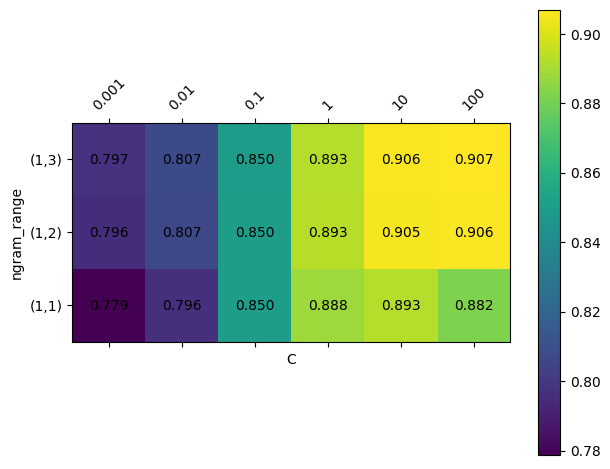

In [32]:
def drawHeatmap(scores, xlabel,
    ylabel='True label', fmt='{:0.2f}', colorbar=None):
    # 反转scores数组的行顺序，以便(0, 0)在左下角  
    scores = scores[::-1, :]  
      
    # 绘制热图  
    fig, ax = plt.subplots()  
    if(colorbar is None):
        colorbar = scores
    cax = ax.matshow(colorbar, cmap='viridis')  
    fig.colorbar(cax)  
      
    # 假设param_grid['gamma']和param_grid['C']已经定义  
    # 这里我们使用字符串列表作为示例  
    param_grid = {  
        'gamma': ['0.001','0.01', '0.1', '1', '10', '100'],  
        'C':   ['(1,1)','(1,2)','(1,3)']
    }  
      
    # 设置xticks和yticks的位置  
    ticks_x = np.arange(len(param_grid['gamma']))  
    ticks_y = np.arange(len(param_grid['C']))[::-1]  # 反转yticks的顺序以匹配反转的scores  
      
    # 设置xticklabels和yticklabels  
    ax.set_xticks(ticks_x)  
    ax.set_xticklabels(param_grid['gamma'])  
    ax.xaxis.set_tick_params(rotation=45)  
      
    ax.set_yticks(ticks_y)  
    ax.set_yticklabels(param_grid['C'])  
      
    # 设置x轴和y轴的标签  
    ax.set_xlabel(xlabel)  
    ax.set_ylabel(ylabel)  
      
    # 添加数值到每个单元格  
    for (i, j), z in np.ndenumerate(scores):  
        ax.text(j, i, fmt.format(z), ha='center', va='center')  


# 从网格搜索中提取分数
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# 热图可视化
# heatmap = mglearn.tools.heatmap(
#    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
#    xticklabels=param_grid['logisticregression__C'],
#    yticklabels=param_grid['tfidfvectorizer__ngram_range'])

drawHeatmap(scores,xlabel="C", ylabel="ngram_range",fmt='{:0.3f}')

plt.tight_layout()
plt.savefig('Images/00HandleTextData-02.png', bbox_inches='tight')
plt.show()


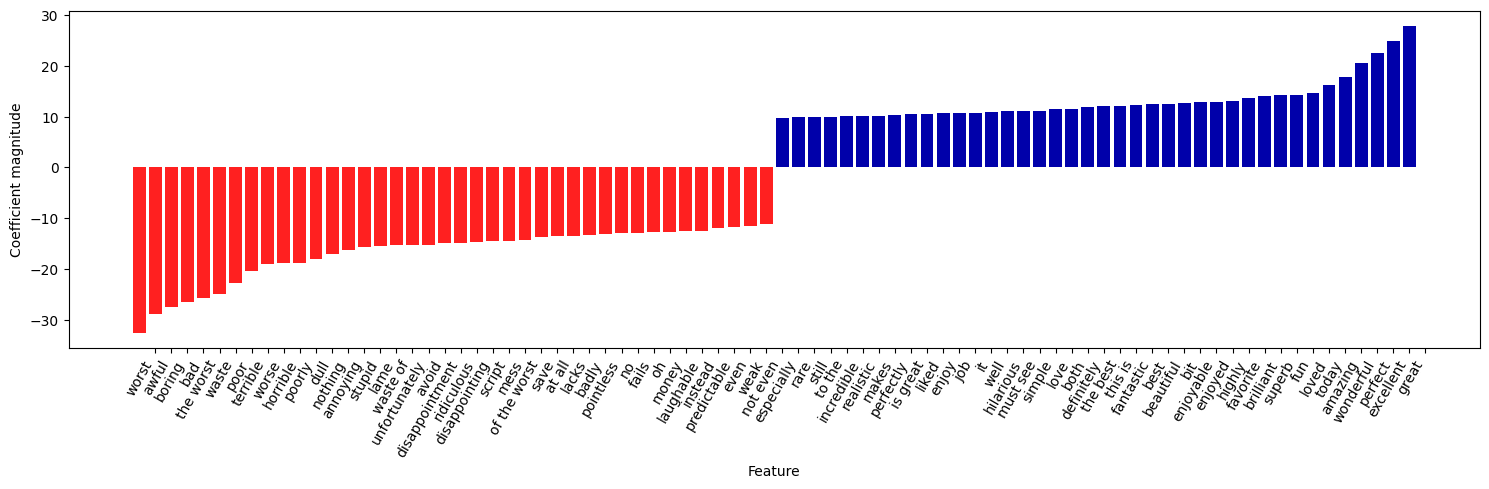

In [33]:
# 提取特征名称与系数
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

plt.tight_layout()
plt.savefig('Images/00HandleTextData-03.png', bbox_inches='tight')
plt.show()

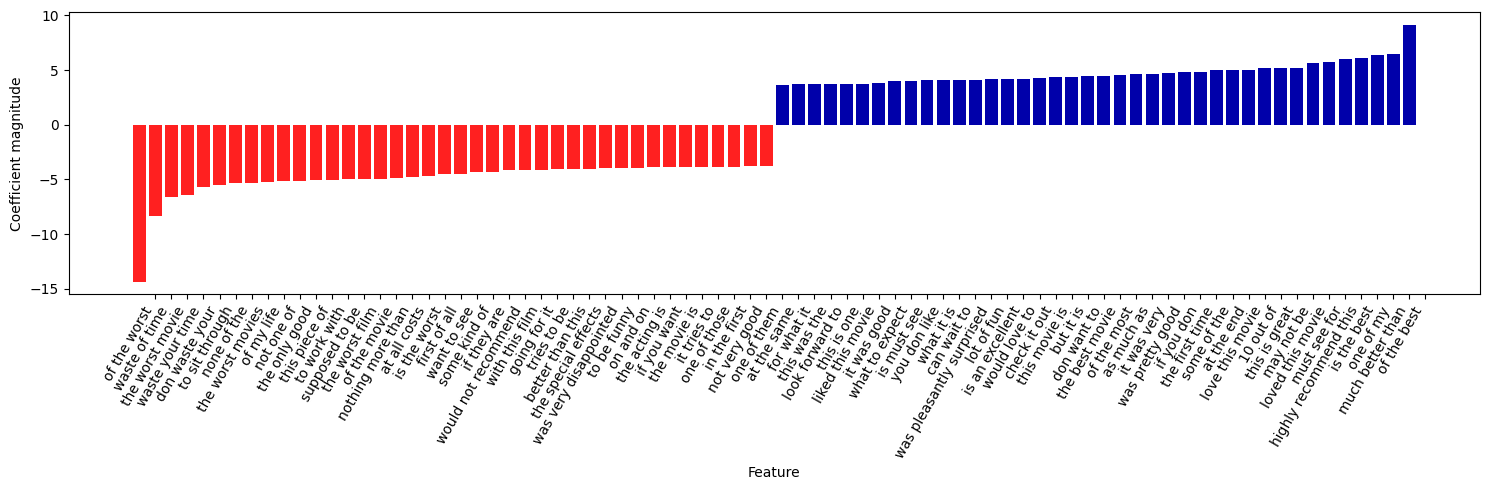

In [34]:
# 找到三元分词特征
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# 仅将三元分词特征可视化
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)

plt.tight_layout()
plt.savefig('Images/00HandleTextData-04.png', bbox_inches='tight')
plt.show()

In [35]:
import spacy
import nltk

# 加载spacy的英语模型
en_nlp = spacy.load('en_core_web_sm')
# 将nltk的Porter词干提取器实例化
stemmer = nltk.stem.PorterStemmer()

# 定义一个函数来对比spacy中的词形还原与nltk中的词干提取
def compare_normalization(doc):
    # 在spacy中对文档进行分词
    doc_spacy = en_nlp(doc)
    # 打印出spacy找到的词元
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    # 打印出Porter词干提取器找到的词例
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [36]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [41]:
# 技术细节：我们希望使用由CountVectorizer所使用的基于正则表达式的分词器，
# 并仅使用spacy的词形还原。
# 为此，我们将en_nlp.tokenizer（spacy分词器）替换为基于正则表达式的分词。
# 引入 CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
# 在CountVectorizer中使用的正则表达式
regexp = re.compile('(?u)\\b\\w\\w+\\b')

# 加载spacy语言模型，并保存旧的分词器
en_nlp = spacy.load('en_core_web_sm')
old_tokenizer = en_nlp.tokenizer
# 将分词器替换为前面的正则表达式
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))

# 用spacy文档处理管道创建一个自定义分词器
# （现在使用我们自己的分词器）
def custom_tokenizer(document):
    doc_spacy = en_nlp(document, entity=False, parse=False)
    return [token.lemma_ for token in doc_spacy]

# 利用自定义分词器来定义一个计数向量器
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)


In [48]:
text_train = reviews_train.data
# 利用带词形还原的CountVectorizer对text_train进行变换
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# 标准的CountVectorizer，以供参考
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

X_train_lemma.shape: (25000, 91079)
X_train.shape: (25000, 27272)


In [49]:
# 仅使用1%的数据作为训练集来构建网格搜索
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
# 利用标准的CountVectorizer进行网格搜索
grid.fit(X_train, y_train)
print("Best cross-validation score "
      "(standard CountVectorizer): {:.3f}".format(grid.best_score_))
# 利用词形还原进行网格搜索
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score "
      "(lemmatization): {:.3f}".format(grid.best_score_))

D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best cross-validation score (standard CountVectorizer): 0.717
Best cross-validation score (lemmatization): 0.743


D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)


In [52]:
from sklearn.decomposition import LatentDirichletAllocation
# 创建 LDA 模型实例
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)
# 我们在一个步骤中构建模型并变换数据
# 计算变换需要花点时间，二者同时进行可以节省时间
document_topics = lda.fit_transform(X)

In [53]:

lda.components_.shape

(10, 10000)

In [55]:
# 对于每个主题（components_的一行），将特征排序（升序）
# 用[:, ::-1]将行反转，使排序变为降序
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# 从向量器中获取特征名称
feature_names = np.array(vect.get_feature_names_out())

In [56]:
# 打印出前10个主题：
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
director      show          book          family        funny         
work          series        original      young         comedy        
performance   war           10            father        cast          
actors        episode       now           us            role          
cast          tv            again         woman         humor         
screen        years         world         own           fun           
performances  american      saw           world         jokes         
role          episodes      read          real          actors        
both          world         didn          mother        performance   
quite         shows         am            between       always        


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [58]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)


In [60]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
drew          didn          ben           emma          years         role          ship          
baseball      going         lines         elvira        saw           oscar         titanic       
maria         seemed        actors        jeremy        again         award         crew          
sports        things        director      hudson        remember      actor         day           
whale         doesn         audience      paltrow       ago           picture       world         
ben           interesting   every         sirk          now           won           air           
red           nothing       worst         austen        watched       roles         sea           
angels        bit           without       bacall        old           supporting    lost          
barrymore 

In [61]:
# 按主题45“music”进行排序
music = np.argsort(document_topics100[:, 45])[::-1]
# 打印出这个主题最重要的前5个文档
for i in music[:10]:
    # 显示前两个句子
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b"This movie is basically a documentary of the chronologically ordered series of events that took place from April 10, 2002 through April 14, 2002 in the Venezuelan Presidential Palace, Caracas Venezuela.<br /><br />The pathos of the movie is real and one feels the pain, sorrow and joy of the people who lived through this failed coup d'etat of President Hugo Chavez.\n"
b'Reviewed at the World Premiere screening Sept. 9, 2006 at the Isabel Bader Theatre during the Toronto International Film Festival (TIFF).\n'
b'Moe and Larry are newly henpecked husbands, having married Shemp\'s demanding sisters. At his music studio, Shemp learns he will inherit a fortune if he marries someone himself! <br /><br />"Husbands Beware" is a remake of 1947\'s "Brideless Groom," widely considered by many to be one of the best Stooge films with Shemp.\n'
b'Sharp, well-made documentary focusing on Mardi Gras beads. I have always liked this approach to film-making - communicate ideas about a larger, more comple

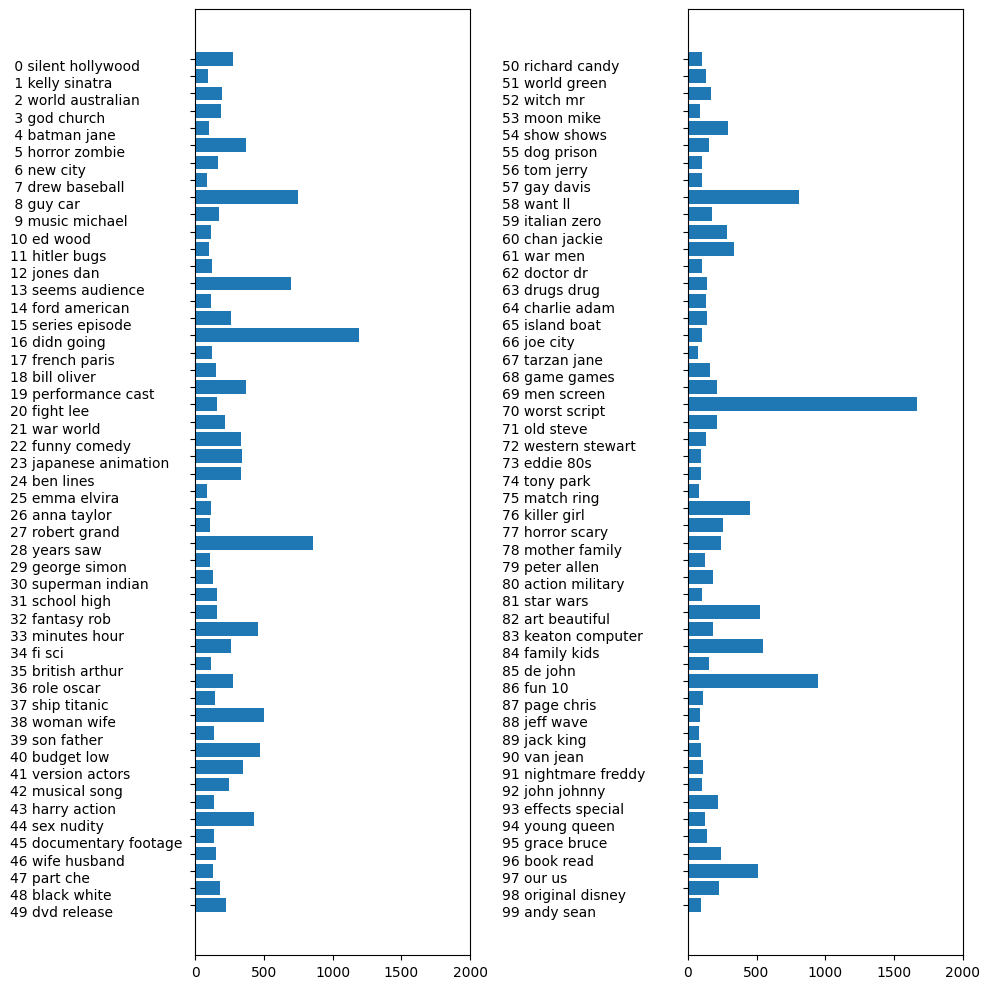

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# 两列的条形图：
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()
plt.savefig('Images/00HandleTextData-05.png', bbox_inches='tight')
plt.show()

In [46]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer

# 加载spacy的英语模型
nlp = spacy.load('en_core_web_sm')

# 定义一个函数，使用spacy进行词形还原
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# 创建一个自定义的tokenizer，使用spacy进行词形还原
def custom_tokenizer(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

# 初始化CountVectorizer，并传入自定义的tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer)

# 示例文本数据
text_train = [
    "The quick brown fox jumped over the lazy dog.",
    "The dog.",
    "The fox jumps over the dog"
]

# 利用带词形还原的CountVectorizer对text_train进行变换
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# 获取特征名称（词汇表）
feature_names = lemma_vect.get_feature_names_out()
print("特征名称：\n", feature_names)


X_train_lemma.shape: (3, 6)
特征名称：
 ['brown' 'dog' 'fox' 'jump' 'lazy' 'quick']
